In [32]:
def read_file(filepath):
    with open(filepath) as f:
        data = list(
            map(lambda x: eval(x.strip()), f.read().splitlines())
            )
        
        tuples = [(data[i], 0) if i < 124 else (data[i], 1) for i in range(len(data))]
        tuples.sort(reverse=False)
        
    return zip(*tuples)
        

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Your function to plot ROC curve for each dataset
def roc(data,labels, ax, plot_label):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(labels, data)

    # Calculate the Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve on the provided axes (ax)
    ax.plot(fpr, tpr, label=f'{plot_label} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.set_title(f'ROC Curve {plot_label}')
    ax.legend(loc='lower right')
    ax.grid(True)
    ax.set_aspect('equal', 'box')

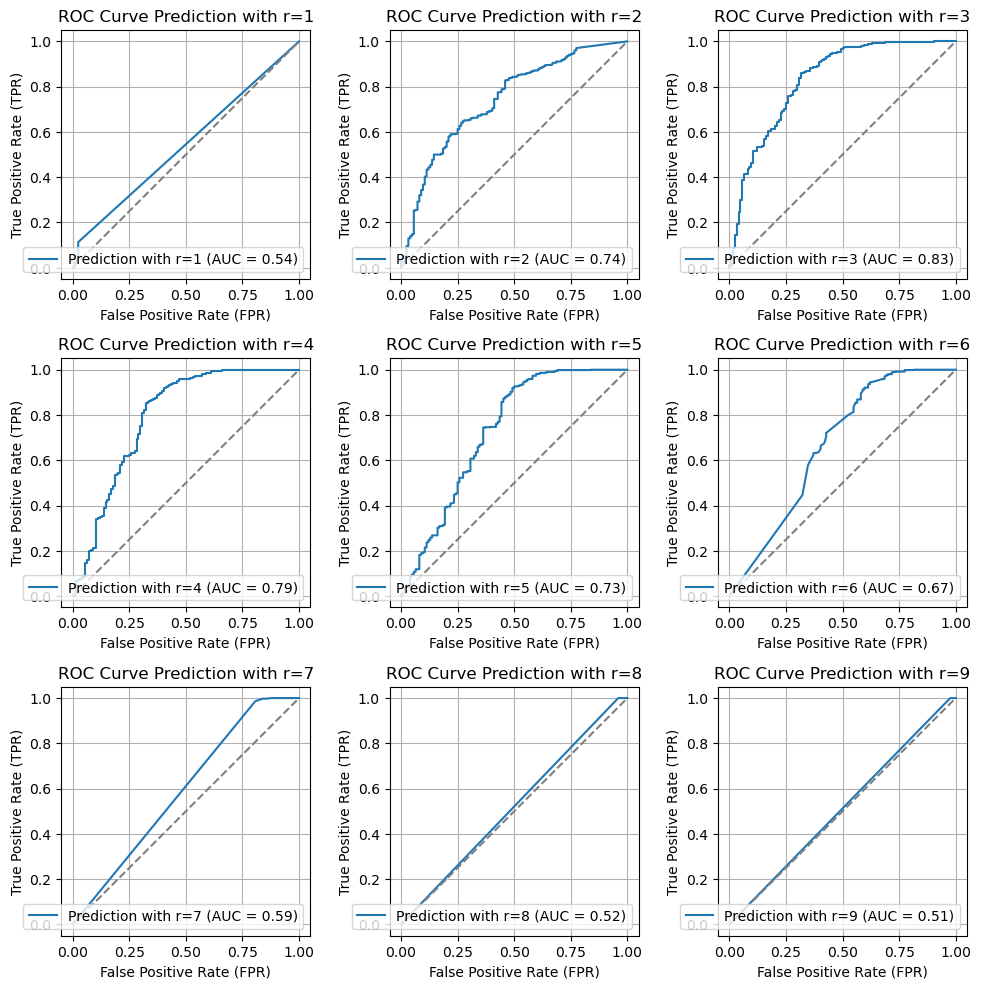

In [49]:
# Create subplots for 8 different ROC curves
fig, axs = plt.subplots(3, 3, figsize=(10, 10))  # 4 rows, 2 columns for 8 subplots
axs = axs.ravel()  # Flatten the 2D array of axes to make it easier to index

# Loop through your files and plot ROC curves in subplots
for n in range(1, 10):
    labels, data = read_file(f"combined_inputs/combined-test-{n}.txt")  # Assuming you have a function to read the files
    roc(labels, data, axs[n-1], f'Prediction with r={n}')  # Plot in the appropriate subplot

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()